# Домашнее задание по теории вероятностей
## Выполнила: Юмагулова Алина, БЭК 151

### Задача 1
Визуализация Human Resources Analytics. Попробуем с помощью данного датасета понять, почему лучшие сотрудники увольняются с работы.

In [508]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import ggplot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [509]:
hr = pd.read_excel("/Users/Andrew/Desktop/HRanalytics.xlsx")

Для начала, ознакомимся с данными: выведем список колонок.

In [510]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'Satisfaction_flag',
       'Times', 'Satisfaction2'],
      dtype='object')

In [511]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
Satisfaction_flag        14999 non-null int64
Times                    14999 non-null int64
Satisfaction2            14999 non-null float64
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [512]:
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Satisfaction_flag,Times,Satisfaction2
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0.4
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,1,0.8
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1,0.2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1,0.8
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0.4


**Далее, проанализируем датасет с помощью графиков:**

**1. Зависимость между уровнем зарплаты, стажем и удовлетворённостью сотрудников своей работой**

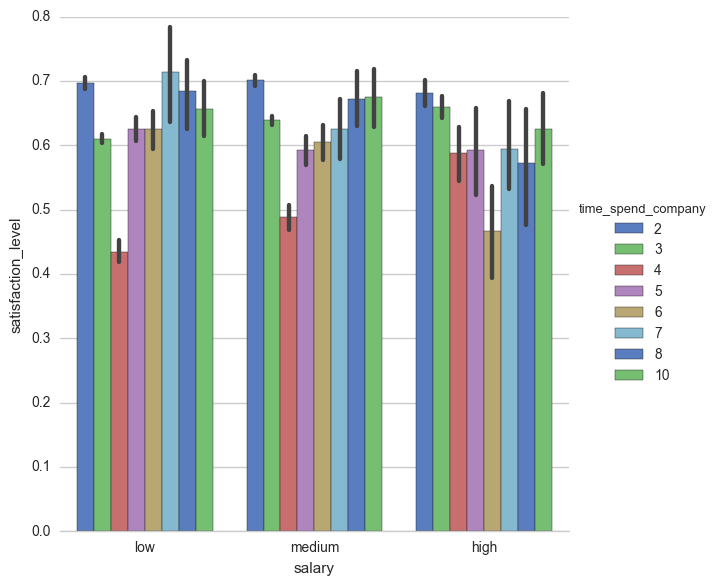

In [513]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="salary", y="satisfaction_level", hue="time_spend_company", data=hr,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("satisfaction_level")

**2. Соотношение уровня удовлетворённости работой и средним количеством рабочих часов в месяц**

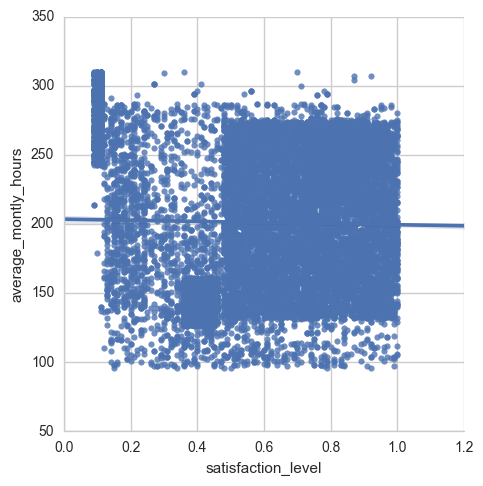

In [514]:
sns.lmplot('satisfaction_level','average_montly_hours', data = hr)

**3. Зависимость между количеством сделанных проектов, последней полученной оценкой, ранжированная по уровню заработной платы работников **

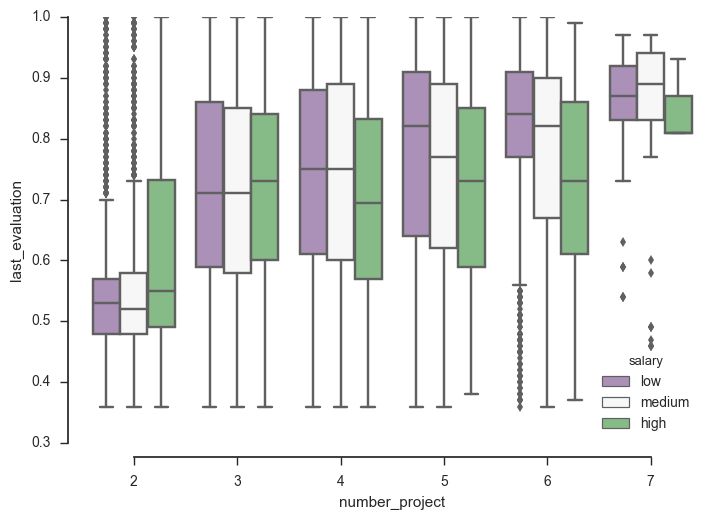

In [515]:
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="number_project", y="last_evaluation", hue="salary", data=hr, palette="PRGn")
sns.despine(offset=10, trim=True)

**4. **

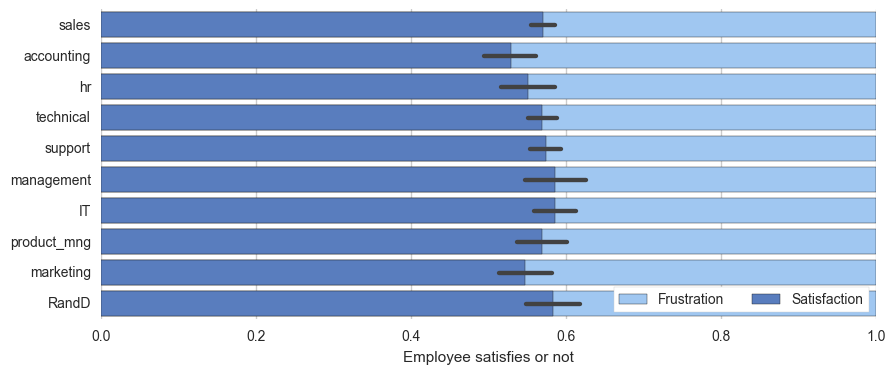

In [516]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 4))
sns.set_color_codes("pastel")
sns.barplot(x="Times", y="sales", data=hr,
            label="Frustration", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Satisfaction_flag", y="sales", data=hr,
            label="Satisfaction", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Employee satisfies or not")
sns.despine(left=True, bottom=True)

**5. Зависимость удовлетворения сотрудников разных профессий от количества отработанных часов в месяц ** 

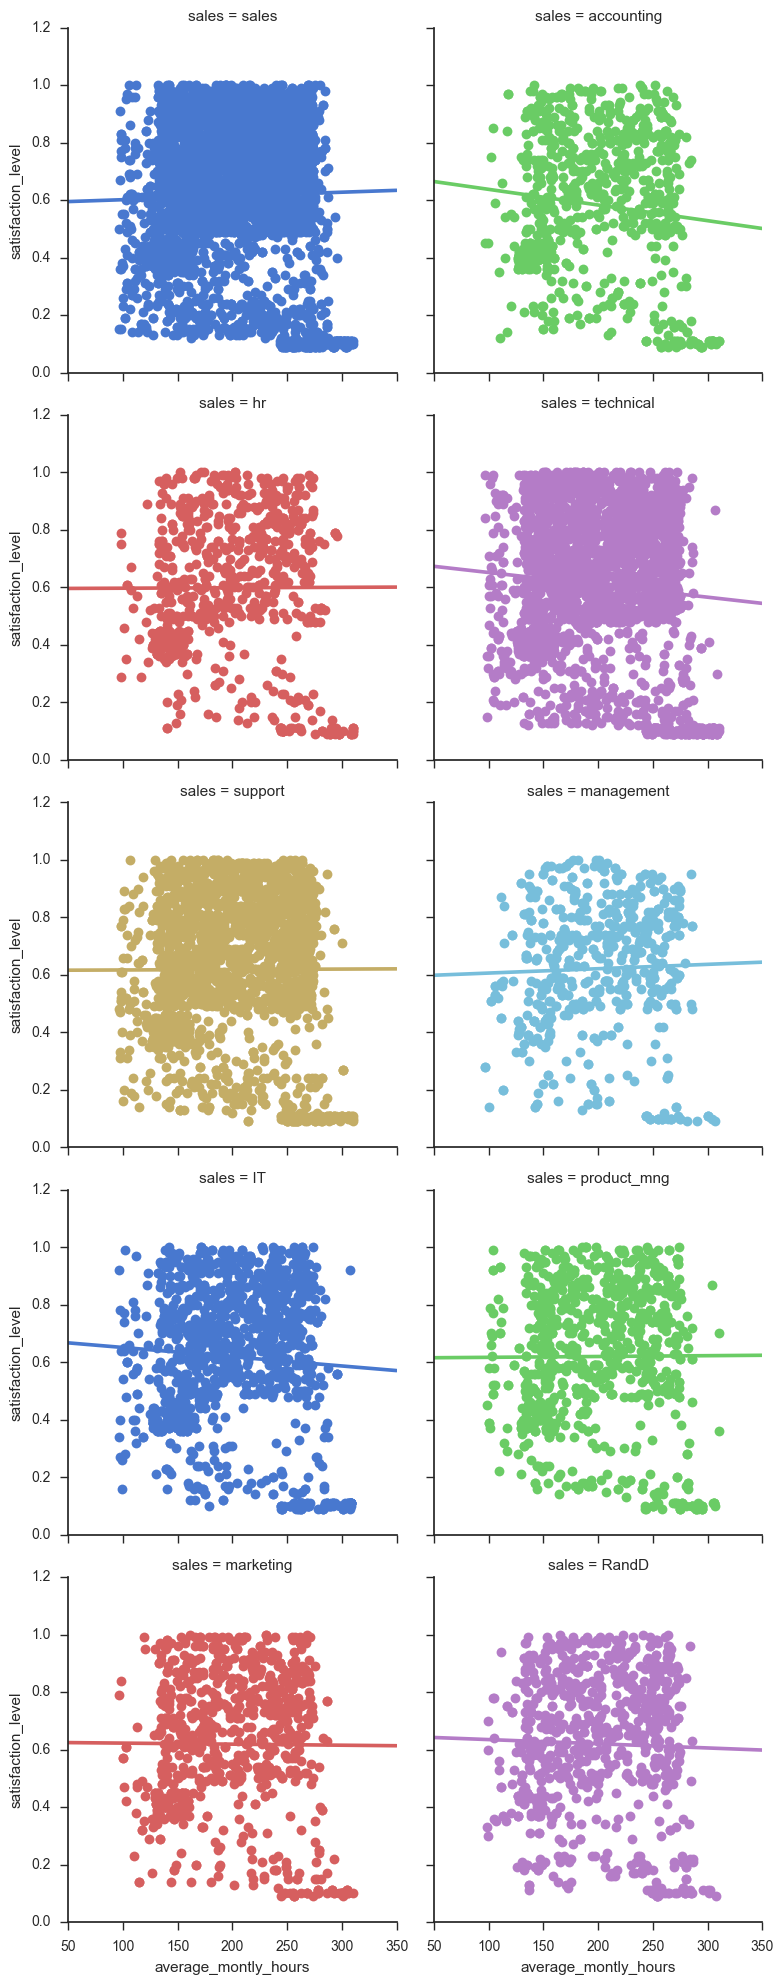

In [517]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = hr

# Show the results of a linear regression within each dataset
sns.lmplot(x="average_montly_hours", y="satisfaction_level", col="sales", hue="sales", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

**6.Зависимость удовлетворения сотрудников разных профессий от уровня заработной платы **

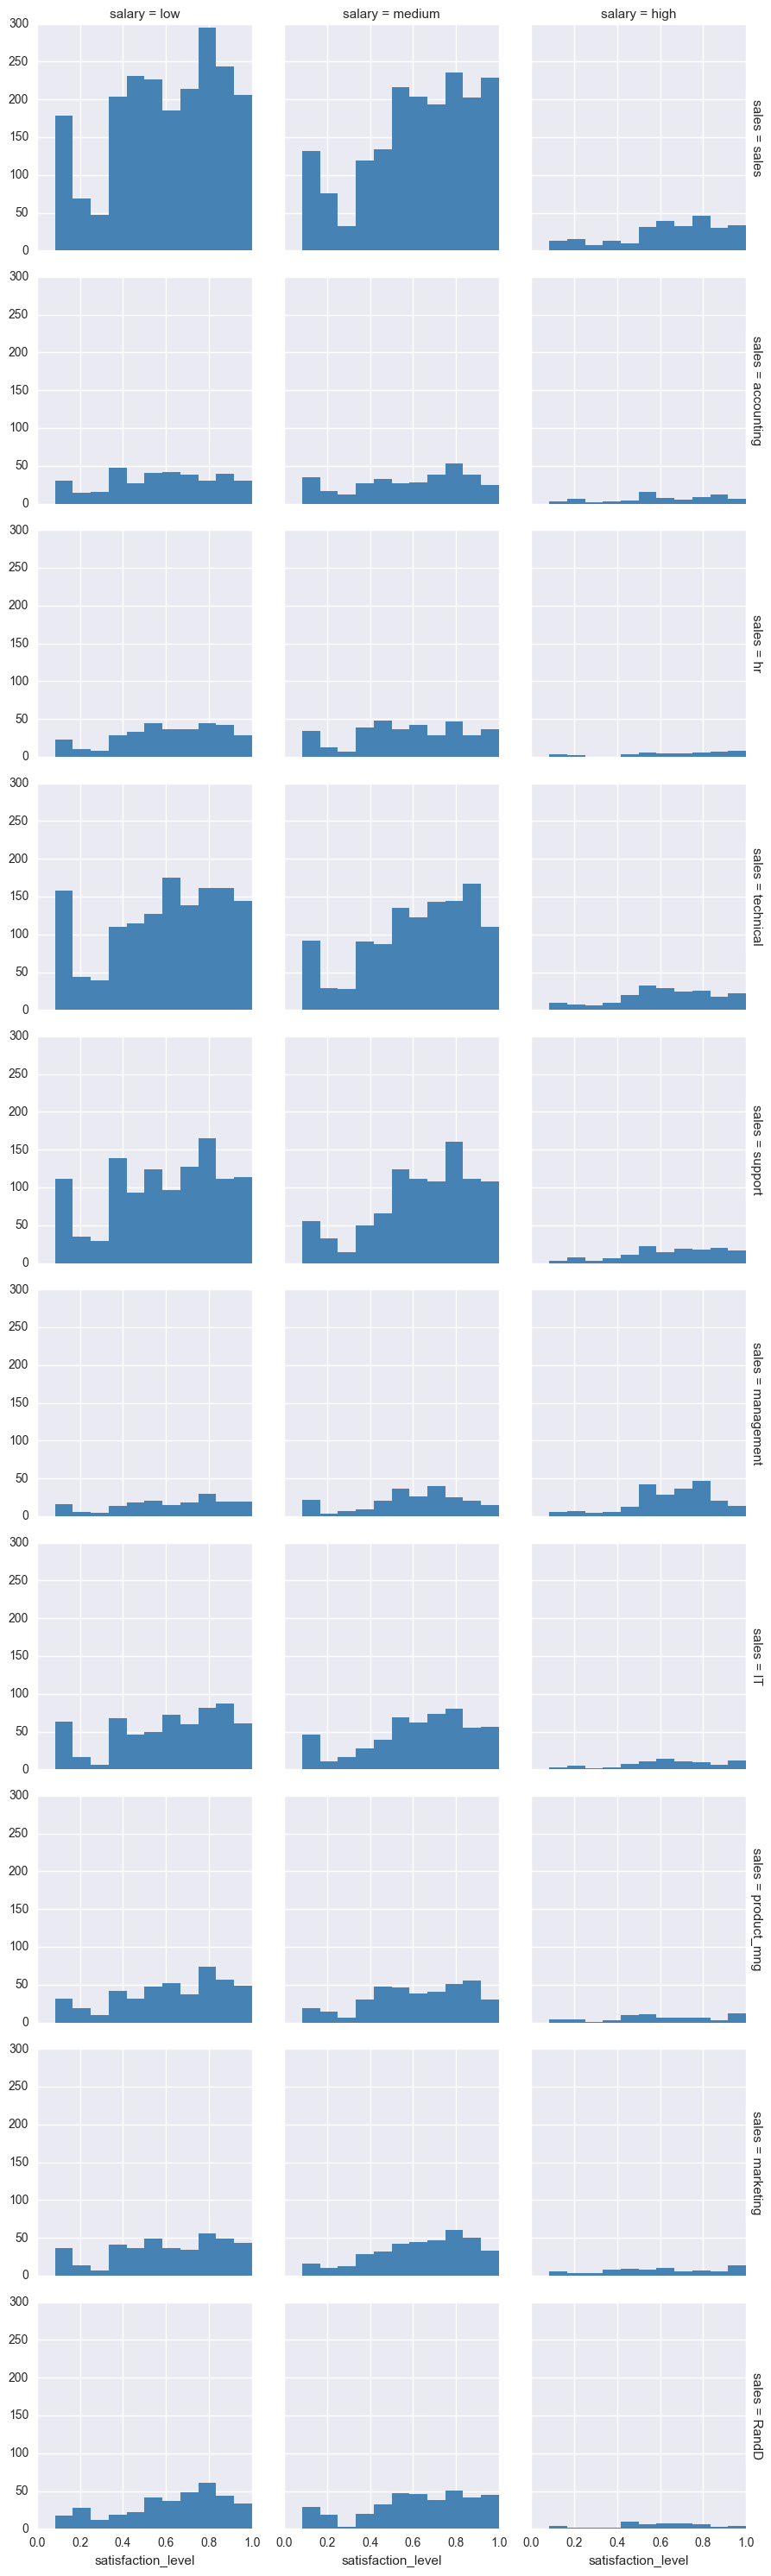

In [518]:
sns.set(style="darkgrid")

tips = hr
g = sns.FacetGrid(tips, row="sales", col="salary", margin_titles=True)
bins = np.linspace(0, 1, 13)
g.map(plt.hist, "satisfaction_level", color="steelblue", bins=bins, lw=0)

### Задача 2

#### 1. Гистограммы распределения

$X_i \sim N[0; 1]$

In [519]:
X = stats.uniform(0, 1)
X_values= X.rvs([50, 100000]) 

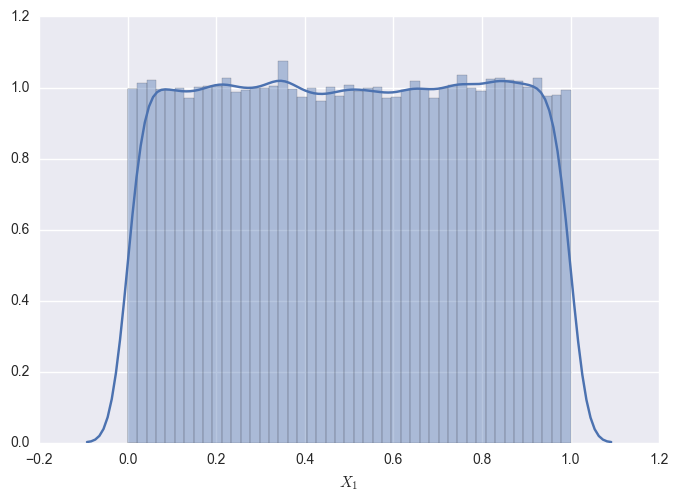

In [520]:
sns.distplot(X_values[0])
plt.xlabel("$X_1$")

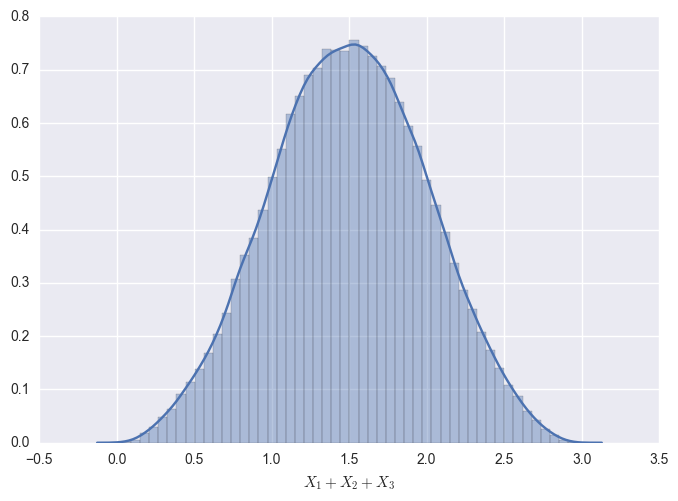

In [521]:
sns.distplot(X_values[0] + X_values[1] + X_values[2])
plt.xlabel("$X_1 + X_2 + X_3$")

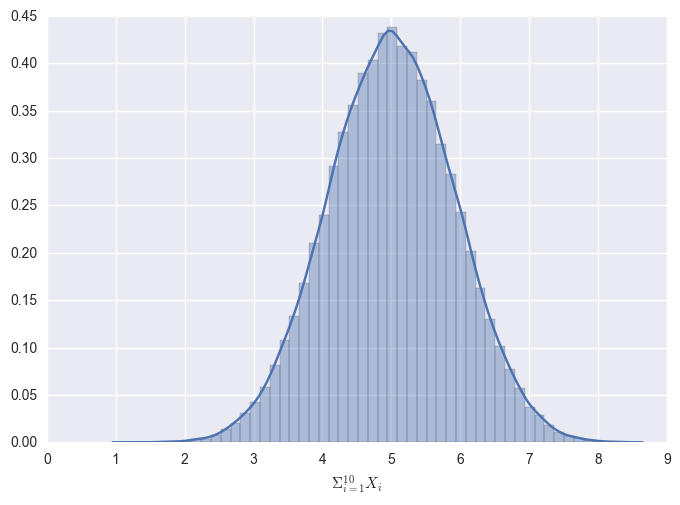

In [522]:
sns.distplot(np.sum(X_values[:10], axis=0))
plt.xlabel("$\Sigma ^{10} _{i = 1} X_i$")

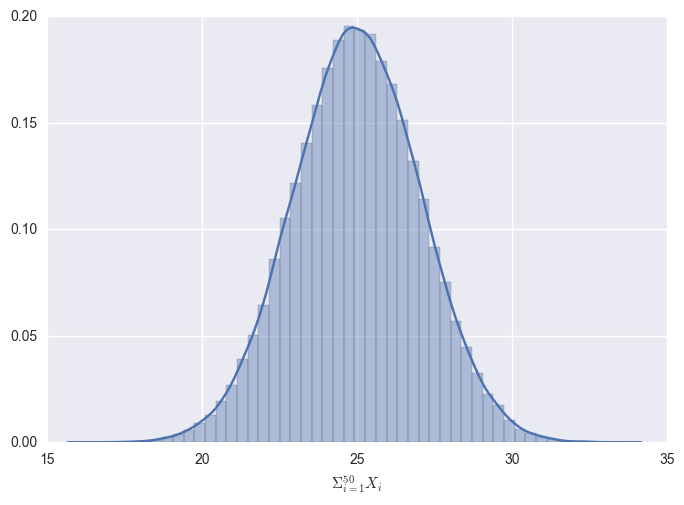

In [523]:
sns.distplot(np.sum(X_values, axis=0))
plt.xlabel("$\Sigma ^{50} _{i = 1} X_i$")

#### 2. Оценивание $P(X_{1}+X_{2}+X_{3} > 2)$

Чтобы найти $P(X_{1}+X_{2}+X_{3} > 2)$, объединим $X_{1}+X_{2}+X_{3}$ в случайную величину $F$. Оценим $P(F)$ как частное количества случаев, где $X_{1}+X_{2}+X_{3} > 2$, к количеству исходов 100000.

In [532]:
F = np.sum(X_values[0:3], axis = 0)
b = 0 
for k in F:
    if k > 2:
        b += 1
print('Ответ:' ,b/100000)

Ответ: 0.16696


#### 3. Оценивание $E(X_1^{5})$ и $Var(X_{1}/1+X_{2}^{2})$

Шаг 1. Найдём $E(X^{5})=\int_{0}^{1} x^{5}f(x) dx$  

In [533]:
x= np.random.uniform(0,1,100000)
y= x**5
np.mean(y)
print('Ответ:' ,np.mean(y))

Ответ: 0.165056136736


Шаг 2. Найдём $Var(X_{1}/1+X_{2}^{2})=Var(X_{1}/1)+Var(X_{2}^{2})+2Cov(X_{1}, X_{2}^2)=Var(X_{1})+Var(X_{2}^{2})$

In [534]:
X1= stats.uniform(0,1)
var1= X1.var()
var1


0.083333333333333329

In [535]:
var2=1/5-(1/3)**2
var2

0.0888888888888889

In [540]:
var1+var2
print('Ответ:' ,var1+var2)

Ответ: 0.172222222222


#### 4. Оценивание медианы и 25%-й квантили для $(1 + X_{1})/(3 + X_{2}$)

In [537]:
F = [(1 + X_values[0][n])/(3 + X_values[1][n]) for n in range(10000)]

In [538]:
np.median(F)

0.42721991366576928

In [539]:
np.percentile(F,25)
print('Ответ:' ,np.percentile(F,25))

Ответ: 0.357117812473


### Задача 3

№55. В углу шахматной доски стоит конь. Мы перемещаем коня наугад, выбирая каждый допустимый ход равновероятно. Сколько в среднем пройдёт ходов прежде чем он вернётся в исходную клетку?

Шаг 1. Находим стабильное распределение для Марковского процесса. Марковскую цепь можно представить в виде графа, в котором вершины — это состояния процесса, а ребра — переходы между состояниями, и на ребре из i в j написана вероятность перехода из i в j. Мы видим, что этот процесс устойчив, если масса для каждого квадрата шахматной доски будет пропорциональна числу ходов коней, ведущих от него. Иными словами, каждый квадрат доски с n шагами, исходящими из него, будет иметь массу n движущихся к нему и массу n движущихся от него, так что всё уравновешивается.

Шаг 2. Нам нужно найти массу всей системы, что есть сумма всех возможных передвижений коня. Для данной шахматной фигуры есть 8 возможных направлений и каждое может иметь исходить из квадрата 6x7, так что масса распределения равна 336.

Шаг 3. Поскольку масса угловой клетки равна двум, она представляет собой 2/336 = 1/168 всей массы распределения. Поскольку процесс рекуррентный, блуждание от любого квадрата будет в этом конкретном углу 1/168 от всех ходов. Это означает, что в среднем конь пройдёт 168 ходов, прежде чем он вернётся в исходную клетку.

Ответ: 168.